<h1 style='color:red;'><center>Car Price Prediction</center></h>

<h3 style='color:red;'>1. Import Dependencies</h3>

In [1]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn import linear_model
from sklearn import metrics

<h3 style='color:red;'>2. Load Data</h3>

In [2]:
#import the dataset
df = pd.read_csv('dataset/vehicles.csv')

In [3]:
#set display all columns
pd.set_option('display.max_columns',80)
#set display all rows
#pd.set_option('display.max_rows',80)

<h3 style='color:red;'>3. Data Cleansing | Wrnagling</h3>

In [4]:
#check all info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [5]:
#drop the features of dataset
df.drop(['url','region_url','image_url','description','lat','long','id','region','county','size',
        'VIN','state', 'posting_date','condition'], axis=1, inplace=True)

In [6]:
#assign data as af
data = df.copy()

In [7]:
#select 2000 up 
data = data[data['year'] > 1999]
data = data[data['price'] > 3000]

In [8]:
#check rows and columns number
data.shape

(340830, 12)

In [9]:
#check null or not
data.isnull().any()

price           False
year            False
manufacturer     True
model            True
cylinders        True
fuel             True
odometer         True
title_status     True
transmission     True
drive            True
type             True
paint_color      True
dtype: bool

In [10]:
#sum all null values in each featues
data.isnull().sum()

price                0
year                 0
manufacturer     10038
model             2664
cylinders       143049
fuel              2263
odometer          1937
title_status      6052
transmission      1683
drive           101491
type             66957
paint_color      95367
dtype: int64

In [11]:
#drop the null values
data.dropna(axis=0, inplace=True)

In [12]:
#drop other values
data.drop(data.loc[data['transmission']=='other'].index, inplace=True)
data.drop(data.loc[data['type']=='other'].index, inplace=True)

In [13]:
#sum all null values in each featues
data.isnull().sum()

price           0
year            0
manufacturer    0
model           0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
dtype: int64

In [14]:
#check samples after cleansing
data.shape

(114605, 12)

In [15]:
#check data type in each features
data.dtypes

price             int64
year            float64
manufacturer     object
model            object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
type             object
paint_color      object
dtype: object

In [16]:
#change data type
data.price = data.price.astype('float')
data.year = data.year.astype('int')

In [17]:
#replace 
data.cylinders = data.cylinders.astype(str)
data.cylinders = data.cylinders.str.replace('cylinders','')
data.cylinders = data.cylinders.str.replace('other','0')
data.cylinders = data.cylinders.astype(int)

In [18]:
#rename the features
data.rename(columns={
    'price':'price',
    'year':'year',
    'manufacturer':'manufacturer',
    'model':'model',
#    'condition':'condition',
    'cylinders':'cylinder',
    'fuel':'fuel',
    'odometer':'kms_driven',
    'title_status':'status',
    'transmission':'transmission',
    'drive':'drive_wheel',
    'type':'body_type',
    'paint_color':'colour'
}, inplace=True)

In [19]:
# convert model datatype
data.model = data.model.astype(str)

In [20]:
#drop car value count under 100
drop_model_car = data['model'].value_counts()
data = data[~data['model'].isin(drop_model_car[drop_model_car < 100].index)]

In [21]:
#replace other by petrol
data.fuel = data.fuel.str.replace('other','petrol')

In [22]:
print("**" * 56)
print(data.year.unique())
print("**" * 56)
print("Min Year", data.year.min())
print("**" * 56)
print("Max Year",data.year.max())
print("**" * 56)

****************************************************************************************************************
[2013 2019 2004 2012 2003 2008 2006 2011 2014 2007 2009 2017 2010 2005
 2016 2021 2002 2018 2001 2015 2020 2000]
****************************************************************************************************************
Min Year 2000
****************************************************************************************************************
Max Year 2021
****************************************************************************************************************


In [23]:
#replace manufacturer 
data.manufacturer = data.manufacturer.str.replace('-',' ')

In [24]:
print("**" * 56)
print(data.manufacturer.unique())
print("**" * 56)

****************************************************************************************************************
['ford' 'toyota' 'honda' 'chrysler' 'jeep' 'nissan' 'buick' 'hyundai'
 'gmc' 'chevrolet' 'volvo' 'ram' 'dodge' 'kia' 'volkswagen' 'acura'
 'cadillac' 'bmw' 'lexus' 'mercedes benz' 'lincoln' 'subaru' 'audi'
 'pontiac' 'rover' 'mazda' 'mitsubishi' 'mini']
****************************************************************************************************************


In [25]:
print("**" * 56)
print("Number Of Model Car - Unique Values :",len(data['model'].value_counts()))
print("**" * 56)

****************************************************************************************************************
Number Of Model Car - Unique Values : 197
****************************************************************************************************************


In [26]:
print("**" * 56)
print(data.cylinder.value_counts())
print("**" * 56)

****************************************************************************************************************
4     23999
6     19854
8     14996
5       394
0       208
10      196
3        63
12        3
Name: cylinder, dtype: int64
****************************************************************************************************************


In [27]:
print("**" * 56)
print(data.fuel.value_counts())
print("**" * 56)

****************************************************************************************************************
gas         54943
diesel       3654
hybrid        621
petrol        491
electric        4
Name: fuel, dtype: int64
****************************************************************************************************************


In [28]:
print("**" * 56)
print("MAX Meters",data.kms_driven.max())
print("**" * 56)
print("MIN Meters",data.kms_driven.min())
print("**" * 56)
print("AVERAGE Meters",data.kms_driven.mean())
print("**" * 56)

****************************************************************************************************************
MAX Meters 9999999.0
****************************************************************************************************************
MIN Meters 0.0
****************************************************************************************************************
AVERAGE Meters 105358.54410262422
****************************************************************************************************************


In [29]:
print("**" * 56)
print(data.status.value_counts())
print("**" * 56)

****************************************************************************************************************
clean         56890
rebuilt        1723
salvage         681
lien            403
missing          11
parts only        5
Name: status, dtype: int64
****************************************************************************************************************


In [30]:
print("**" * 56)
print(data.transmission.value_counts())
print("**" * 56)

****************************************************************************************************************
automatic    56897
manual        2816
Name: transmission, dtype: int64
****************************************************************************************************************


In [31]:
print("**" * 56)
print(data.drive_wheel.value_counts())
print("**" * 56)

****************************************************************************************************************
4wd    26678
fwd    24216
rwd     8819
Name: drive_wheel, dtype: int64
****************************************************************************************************************


In [32]:
print("**" * 56)
print(data.body_type.value_counts())
print("**" * 56)

****************************************************************************************************************
sedan          18204
SUV            17177
truck          10117
pickup          5876
coupe           2063
wagon           1652
hatchback       1463
van             1343
mini-van        1222
convertible      457
offroad          133
bus                6
Name: body_type, dtype: int64
****************************************************************************************************************


In [33]:
print("**" * 56)
print(data.colour.value_counts())
print("**" * 56)

****************************************************************************************************************
white     13699
black     11366
silver     9235
grey       7915
blue       5906
red        5518
custom     2780
brown      1351
green      1182
yellow      366
orange      269
purple      126
Name: colour, dtype: int64
****************************************************************************************************************


In [34]:
data.columns

Index(['price', 'year', 'manufacturer', 'model', 'cylinder', 'fuel',
       'kms_driven', 'status', 'transmission', 'drive_wheel', 'body_type',
       'colour'],
      dtype='object')

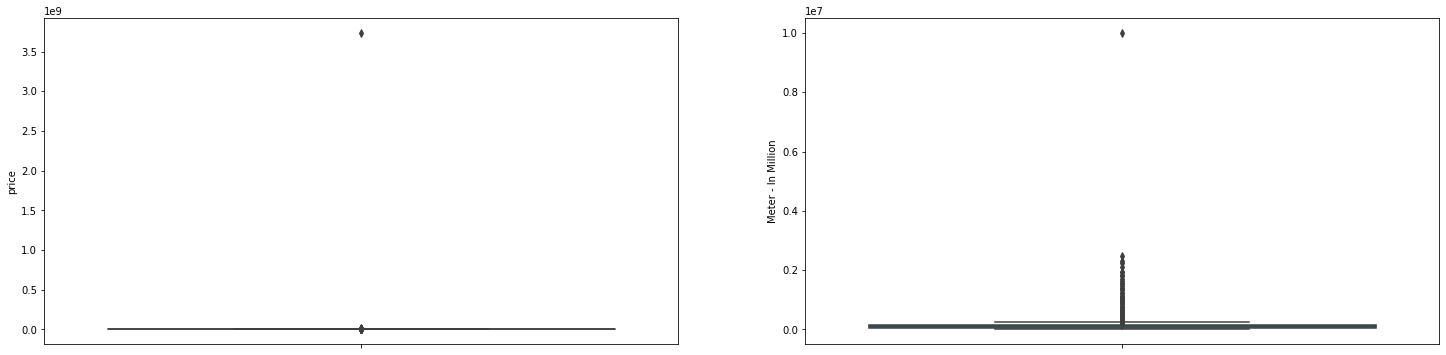

In [35]:
#check outlier
f, axes = plt.subplots(ncols=2, figsize=(25, 6))

sns.boxplot(y=data['price'], ax=axes[0])
sns.boxplot(y=data['kms_driven'], ax=axes[1])
plt.ylabel('Meter - In Million')
plt.show()

In [36]:
from scipy.stats import zscore

for i in range(1,10):
    #remove outliers
    data['meter_outliers'] = zscore(data['kms_driven'])
    #define meter outliers
    data[(data.meter_outliers > 3.0) | (data.meter_outliers < -3.0) ]
    #drop outliers
    data = data.drop(data[(data.meter_outliers > 3.0) | (data.meter_outliers < -3.0) ].index)

In [37]:
for i in range(1,10):    
    #remove price outliers
    data['price_outliers'] = zscore(data['price'])
    #define meter outliers
    data[(data.price_outliers > 3.0) | (data.price_outliers < -3.0) ]
    #drop outliers
    data = data.drop(data[(data.price_outliers > 3.0) | (data.price_outliers < -3.0) ].index)

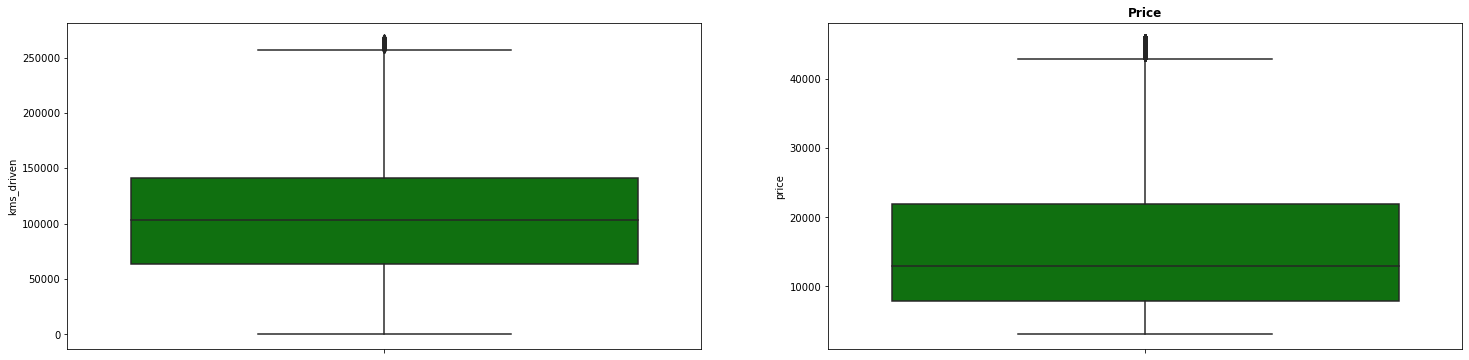

In [38]:
f, axes = plt.subplots(ncols=2, figsize=(25, 6))
sns.boxplot(y=data['kms_driven'], color='green',ax=axes[0])
plt.title('ODO Meter', fontweight='bold')
sns.boxplot(y=data['price'], color='green',ax=axes[1])
plt.title('Price', fontweight='bold')
plt.show()

In [39]:
#drop meter outliers column
data.drop('meter_outliers', axis=1, inplace=True)
data.drop('price_outliers', axis=1, inplace=True)

In [40]:
#drop cylinder = 0
data = data.drop(data[(data.cylinder == 0)].index)

In [41]:
data.describe(include='all')

,price,year,manufacturer,model,cylinder,fuel,kms_driven,status,transmission,drive_wheel,body_type,colour
count,57342.000000,57342.000000,57342,57342,57342.000000,57342,57342.000000,57342,57342,57342,57342,57342
unique,NaN,NaN,28,197,NaN,5,NaN,6,2,3,12,12
top,NaN,NaN,ford,f-150,NaN,gas,NaN,clean,automatic,4wd,sedan,white
freq,NaN,NaN,11737,2285,NaN,53683,NaN,54575,54664,24749,18102,12950
mean,15909.550923,2012.267710,NaN,NaN,5.638677,NaN,104590.902550,NaN,NaN,NaN,NaN,NaN
std,10102.412172,4.584551,NaN,NaN,1.594737,NaN,54480.426666,NaN,NaN,NaN,NaN,NaN
min,3050.000000,2000.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,7900.000000,2009.000000,NaN,NaN,4.000000,NaN,63871.000000,NaN,NaN,NaN,NaN,NaN
50%,12999.000000,2013.000000,NaN,NaN,6.000000,NaN,103176.000000,NaN,NaN,NaN,NaN,NaN
75%,21991.000000,2016.000000,NaN,NaN,6.000000,NaN,141119.000000,NaN,NaN,NaN,NaN,NaN


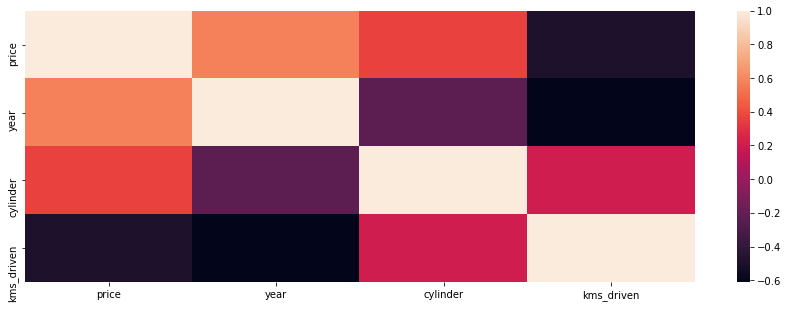

In [42]:
plt.figure(figsize=(15,5))
correlation = data.corr(method='pearson')
sns.heatmap(correlation,xticklabels=correlation.columns.values,
           yticklabels=correlation.columns.values)
plt.show()

<h3 style='color:red;'>4. Data Analysis | Exploratory Data Analysis</h3>

<h3 style='color:red;'>4.1 EDA 1</h3>

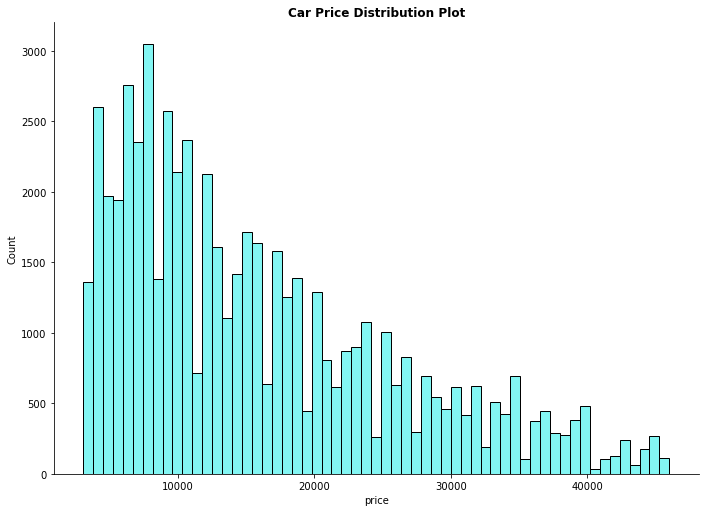

In [43]:
sns.displot(data.price,height=7, aspect=11.7/8.27, color='#5AF3F0')
plt.title('Car Price Distribution Plot', fontweight='bold')
plt.show()

In [44]:
#check statistic description of price features
print(data.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    57342.000000
mean     15909.550923
std      10102.412172
min       3050.000000
25%       7900.000000
50%      12999.000000
75%      21991.000000
85%      27900.000000
90%      31900.000000
100%     46000.000000
max      46000.000000
Name: price, dtype: float64


Text(0.5, 1.0, 'Car Companies')

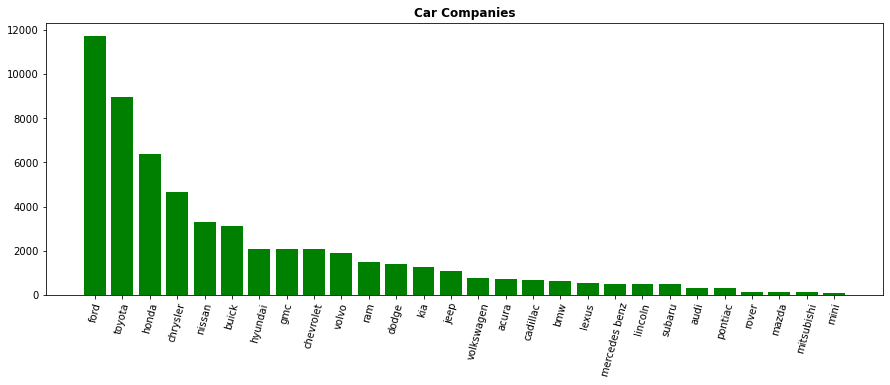

In [45]:
plt.figure(figsize=(15,5))
manufacturer_type = data.manufacturer.value_counts()
plt.bar(data.manufacturer.unique(),manufacturer_type, color='green')
plt.xticks(rotation='75')
plt.title('Car Companies', fontweight='bold')

In [46]:
#plt.figure(figsize=(8,8))
#condition_type = data.condition.value_counts()
#plt.pie(condition_type,labels=data.condition.unique(),autopct='%1.2f%%')
#plt.title('Condition Of Car', fontweight='bold')

In [47]:
#plt.figure(figsize=(15,5))
#plt.bar(data.condition.unique(),condition_type, color='green')
#sns.barplot(x=data.condition.unique(), y=data.condition.value_counts())
#plt.xticks(rotation='0')
#plt.title('Condition Of Car', fontweight='bold')
#plt.show()

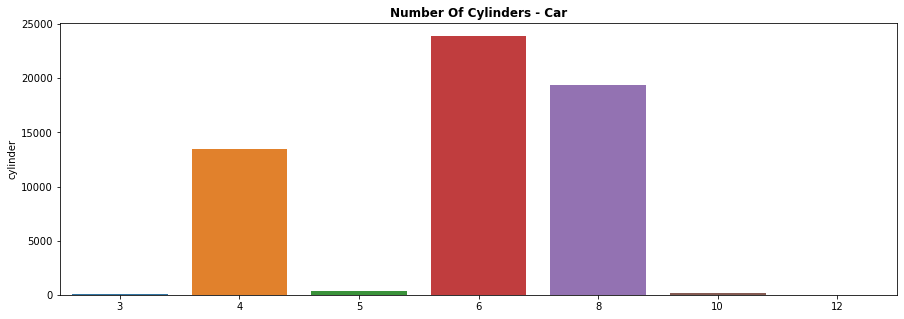

In [48]:
plt.figure(figsize=(15,5))
#plt.bar(data.condition.unique(),condition_type, color='green')
sns.barplot(x=data.cylinder.unique(), y=data.cylinder.value_counts())
plt.xticks(rotation='0')
plt.title('Number Of Cylinders - Car', fontweight='bold')
plt.show()

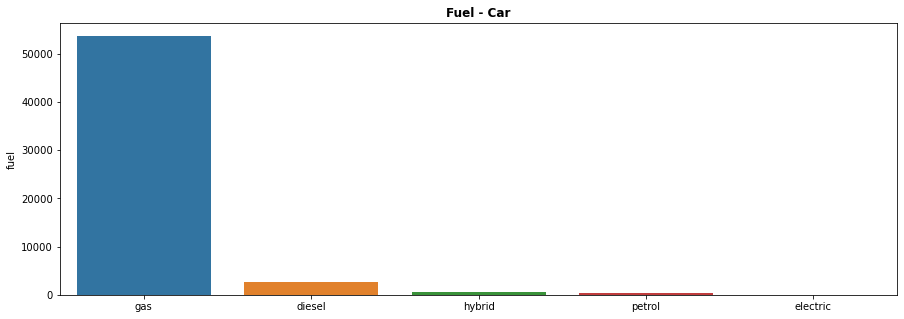

In [49]:
plt.figure(figsize=(15,5))
sns.barplot(x=data.fuel.unique(), y=data.fuel.value_counts())
plt.xticks(rotation='0')
plt.title('Fuel - Car', fontweight='bold')
plt.show()

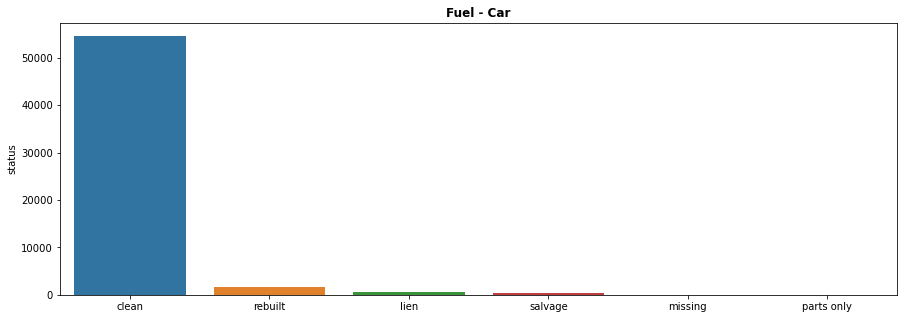

In [50]:
plt.figure(figsize=(15,5))
sns.barplot(x=data.status.unique(), y=data.status.value_counts())
plt.xticks(rotation='0')
plt.title('Fuel - Car', fontweight='bold')
plt.show()

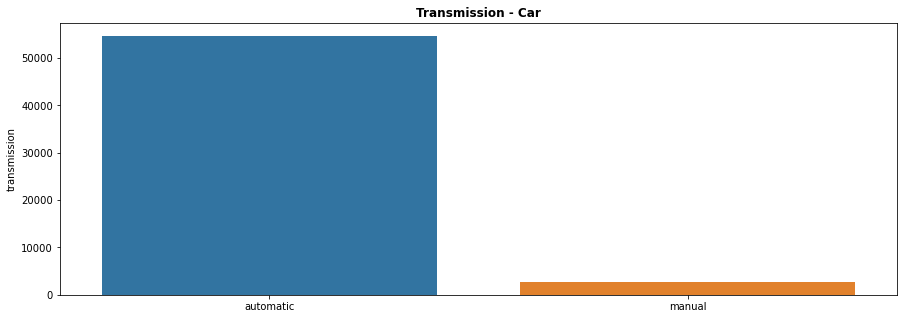

In [51]:
plt.figure(figsize=(15,5))
sns.barplot(x=data.transmission.unique(), y=data.transmission.value_counts())
plt.xticks(rotation='0')
plt.title('Transmission - Car', fontweight='bold')
plt.show()

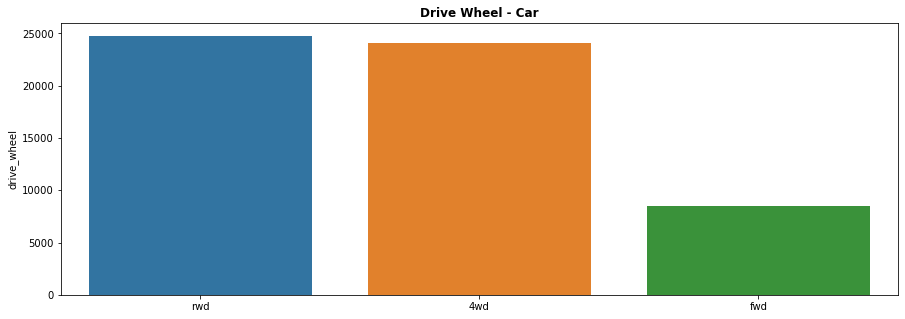

In [52]:
plt.figure(figsize=(15,5))
sns.barplot(x=data.drive_wheel.unique(), y=data.drive_wheel.value_counts())
plt.xticks(rotation='0')
plt.title('Drive Wheel - Car', fontweight='bold')
plt.show()

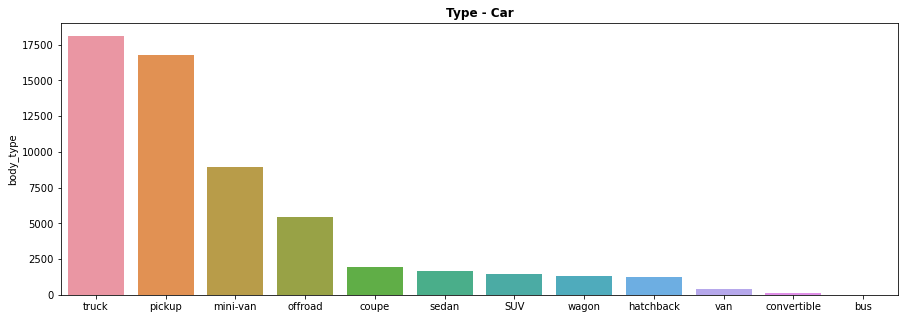

In [53]:
plt.figure(figsize=(15,5))
sns.barplot(x=data.body_type.unique(), y=data.body_type.value_counts())
plt.xticks(rotation='0')
plt.title('Type - Car', fontweight='bold')
plt.show()

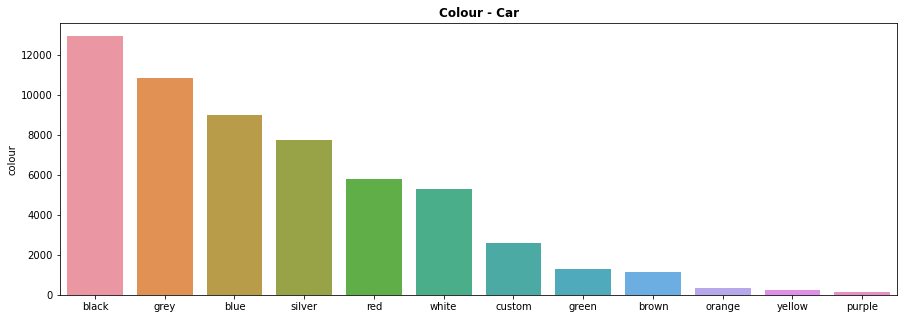

In [54]:
plt.figure(figsize=(15,5))
sns.barplot(x=data.colour.unique(), y=data.colour.value_counts())
plt.xticks(rotation='0')
plt.title('Colour - Car', fontweight='bold')
plt.show()

<h3 style='color:red;'> 4.1 EDA 2 - Deeper Analysis</h3>

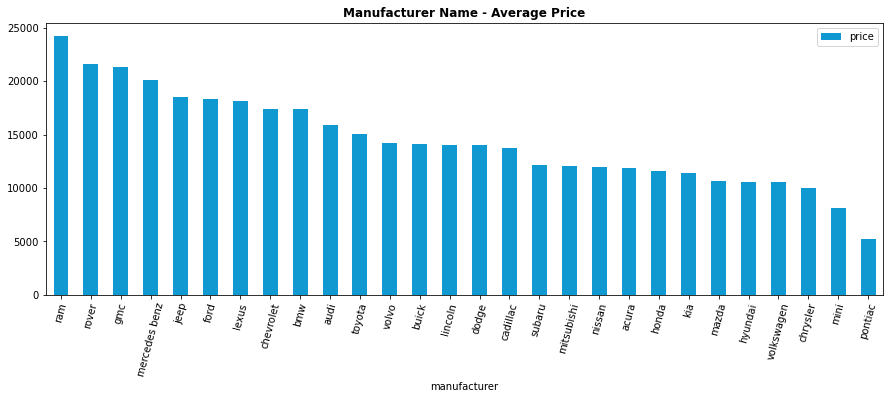

In [55]:
manufacturer_price = pd.DataFrame(data.groupby(['manufacturer'])['price'].mean().sort_values(ascending = False))
#sns.barplot(x=data.manufacturer.unique(), 
#           y=manufacturer_price)
manufacturer_price.plot.bar(color='#1098D1',figsize=(15,5))
plt.xticks(rotation='75')
plt.title('Manufacturer Name - Average Price', fontweight='bold')
plt.show()

In [56]:
#condition_price = pd.DataFrame(data.groupby(['condition'])['price'].mean().sort_values(ascending = False))
#condition_price.plot.bar(color='#E691EE',figsize=(15,5))
#plt.xticks(rotation='0')
#plt.title('Condition - Average Price', fontweight='bold')
#plt.show()

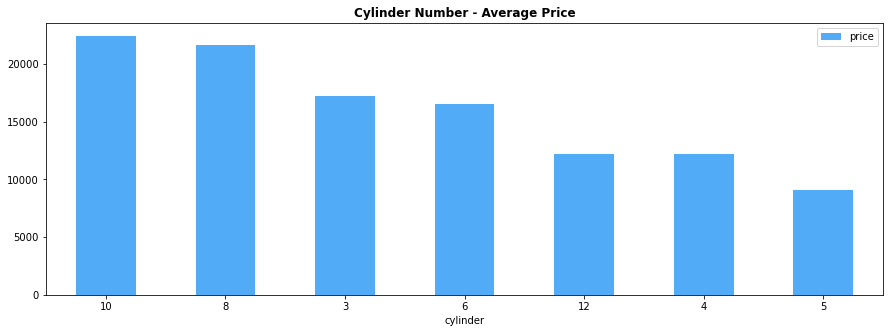

In [57]:
cylinder_price = pd.DataFrame(data.groupby(['cylinder'])['price'].mean().sort_values(ascending = False))
cylinder_price.plot.bar(color='#51ABF7',figsize=(15,5))
plt.xticks(rotation='0')
plt.title('Cylinder Number - Average Price', fontweight='bold')
plt.show()

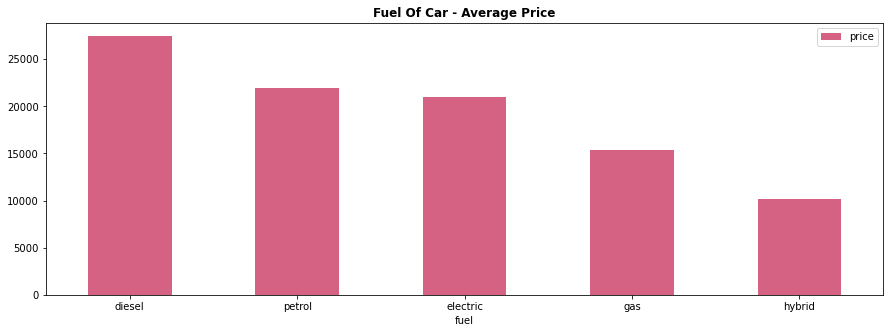

In [58]:
fuel_price = pd.DataFrame(data.groupby(['fuel'])['price'].mean().sort_values(ascending = False))
fuel_price.plot.bar(color='#D56283',figsize=(15,5))
plt.xticks(rotation='0')
plt.title('Fuel Of Car - Average Price', fontweight='bold')
plt.show()

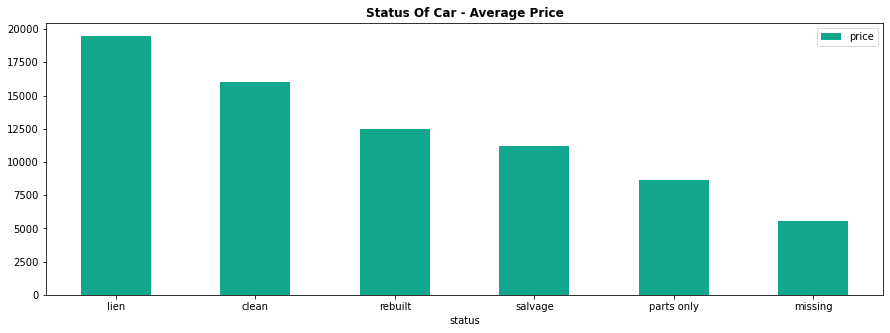

In [59]:
status_price = pd.DataFrame(data.groupby(['status'])['price'].mean().sort_values(ascending = False))
status_price.plot.bar(color='#11A78C',figsize=(15,5))
plt.xticks(rotation='0')
plt.title('Status Of Car - Average Price', fontweight='bold')
plt.show()

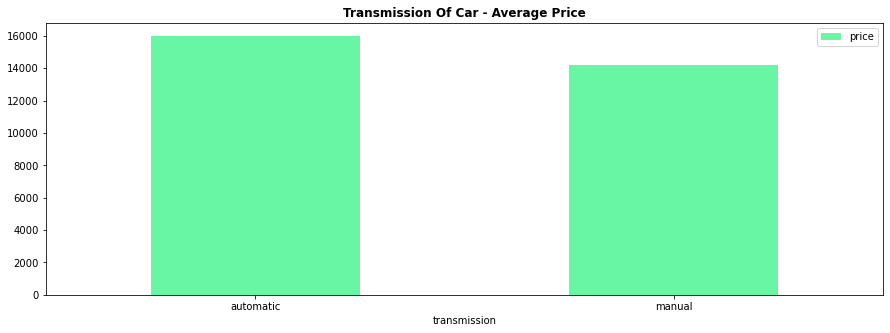

In [60]:
transmission_price = pd.DataFrame(data.groupby(['transmission'])['price'].mean().sort_values(ascending = False))
transmission_price.plot.bar(color='#68F5A4',figsize=(15,5))
plt.xticks(rotation='0')
plt.title('Transmission Of Car - Average Price', fontweight='bold')
plt.show()

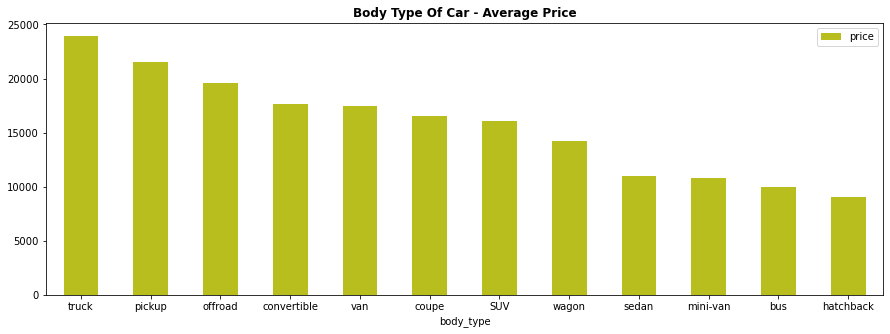

In [61]:
type_price = pd.DataFrame(data.groupby(['body_type'])['price'].mean().sort_values(ascending = False))
type_price.plot.bar(color='#B7BE1D',figsize=(15,5))
plt.xticks(rotation='0')
plt.title('Body Type Of Car - Average Price', fontweight='bold')
plt.show()

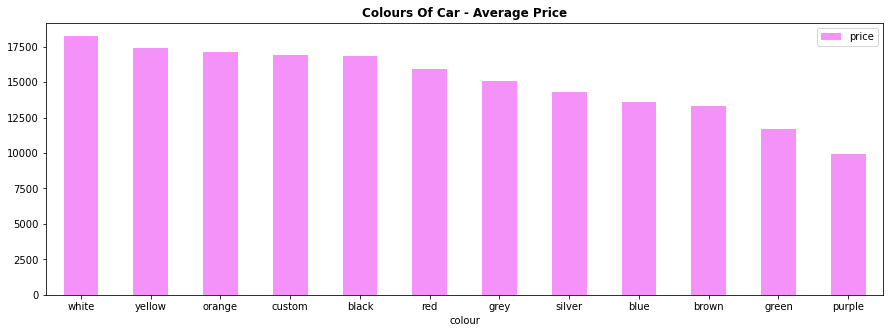

In [62]:
colour_price = pd.DataFrame(data.groupby(['colour'])['price'].mean().sort_values(ascending = False))
colour_price.plot.bar(color='#F492FA',figsize=(15,5))
plt.xticks(rotation='0')
plt.title('Colours Of Car - Average Price', fontweight='bold')
plt.show()

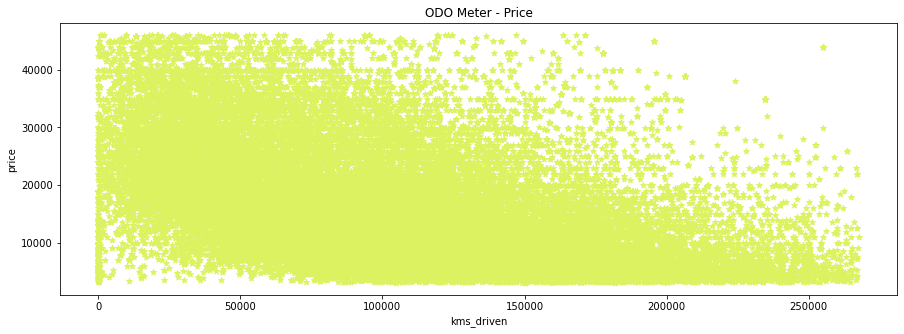

In [63]:
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(data['kms_driven'], data['price'], color='#DCF260',marker='*')
plt.title('ODO Meter - Price')
ax.set_xlabel('kms_driven')
ax.set_ylabel('price')
plt.show()

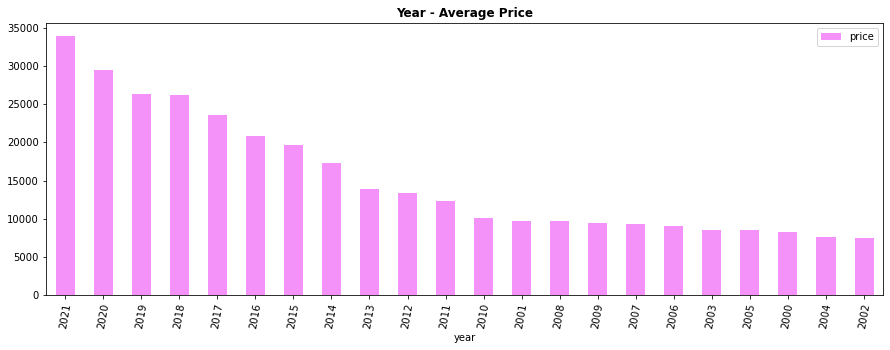

In [64]:
year_price = pd.DataFrame(data.groupby(['year'])['price'].mean().sort_values(ascending = False).head(50))
year_price.plot.bar(color='#F492FA',figsize=(15,5))
plt.xticks(rotation='80')
plt.title('Year - Average Price', fontweight='bold')
plt.show()

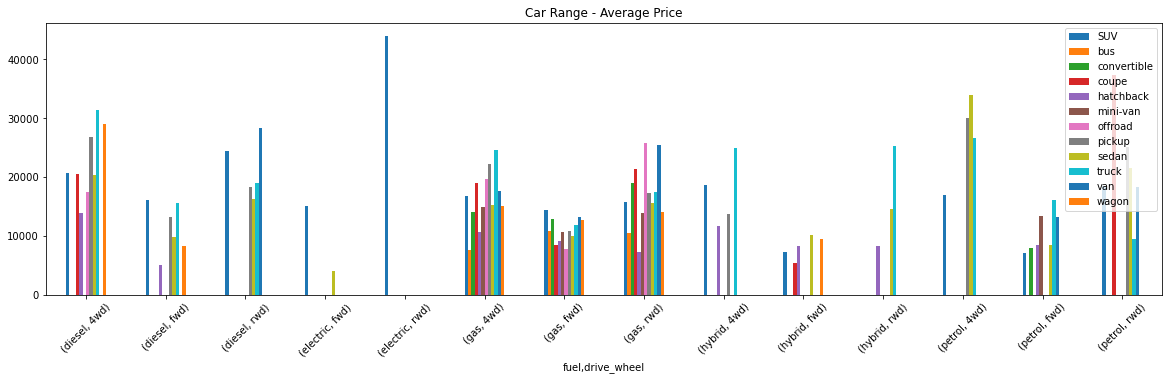

In [65]:
total_price_features = pd.DataFrame(data.groupby(['fuel','drive_wheel','body_type'])['price'].mean().unstack(fill_value=0))
total_price_features.plot.bar(figsize=(20,5))
plt.xticks(rotation='45')
plt.legend(loc='upper right')
plt.title('Car Range - Average Price')
plt.show()

<h3 style='color:red;'>5. Data Preprocessing</h3>

In [66]:
#define a variable
vehicle_dummies = data[['price','year','manufacturer','model','cylinder',
                        'fuel','kms_driven','status','transmission','drive_wheel','body_type','colour']]

In [67]:
# Defining the map function
def cat_dummies(x,data):
    va_dummies = pd.get_dummies(data[x], drop_first = False)
    data = pd.concat([data, va_dummies], axis = 1)
    data.drop([x], axis = 1, inplace = True)
    return data

In [68]:
#print the dtype of each columns
vehicle_dummies.dtypes

price           float64
year              int64
manufacturer     object
model            object
cylinder          int64
fuel             object
kms_driven      float64
status           object
transmission     object
drive_wheel      object
body_type        object
colour           object
dtype: object

<h3 style='color:red;'>**************** Feature Scaling  ****************</h3>

In [69]:
# Applying the function to the cat_demmies
vehicle_dummies = cat_dummies('manufacturer',vehicle_dummies)
#vehicle_demmies = cat_dummies('model',vehicle_demmies)
#vehicle_dummies = cat_dummies('condition',vehicle_dummies)
vehicle_dummies = cat_dummies('fuel',vehicle_dummies)
vehicle_dummies = cat_dummies('status',vehicle_dummies)
vehicle_dummies = cat_dummies('transmission',vehicle_dummies)
vehicle_dummies = cat_dummies('drive_wheel',vehicle_dummies)
vehicle_dummies = cat_dummies('body_type',vehicle_dummies)
vehicle_dummies = cat_dummies('colour',vehicle_dummies)

In [70]:
from sklearn.preprocessing import LabelEncoder
label_enconder = LabelEncoder()

#label encoder for model features
#replace 1-1XX to model features
vehicle_dummies.model = label_enconder.fit_transform(vehicle_dummies.model)

In [71]:
#check rows and columns
vehicle_dummies.shape

(57342, 73)

In [72]:
#print the columns
print("Number Of Columns:", len(vehicle_dummies.columns))

Number Of Columns: 73


In [73]:
vehicle_dummies.columns

Index(['price', 'year', 'model', 'cylinder', 'kms_driven', 'acura', 'audi',
       'bmw', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'dodge', 'ford',
       'gmc', 'honda', 'hyundai', 'jeep', 'kia', 'lexus', 'lincoln', 'mazda',
       'mercedes benz', 'mini', 'mitsubishi', 'nissan', 'pontiac', 'ram',
       'rover', 'subaru', 'toyota', 'volkswagen', 'volvo', 'diesel',
       'electric', 'gas', 'hybrid', 'petrol', 'clean', 'lien', 'missing',
       'parts only', 'rebuilt', 'salvage', 'automatic', 'manual', '4wd', 'fwd',
       'rwd', 'SUV', 'bus', 'convertible', 'coupe', 'hatchback', 'mini-van',
       'offroad', 'pickup', 'sedan', 'truck', 'van', 'wagon', 'black', 'blue',
       'brown', 'custom', 'green', 'grey', 'orange', 'purple', 'red', 'silver',
       'white', 'yellow'],
      dtype='object')

In [74]:
#use train test split function
# np.random.seed(0) makes the random numbers predictable
np.random.seed(0)
data_train, data_test = train_test_split(vehicle_dummies, train_size = 0.7, test_size = 0.3, random_state = 100)

In [75]:
#features selecting of vihecle 
num_variables = ['price', 'year', 'model', 'cylinder', 'kms_driven', 'acura', 'audi',
       'bmw', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'dodge', 'ford',
       'gmc', 'honda', 'hyundai', 'jeep', 'kia', 'lexus', 'lincoln', 'mazda',
       'mercedes benz', 'mini', 'mitsubishi', 'nissan', 'pontiac', 'ram',
       'rover', 'subaru', 'toyota', 'volkswagen', 'volvo', 'diesel',
       'electric', 'gas', 'hybrid', 'petrol', 'clean', 'lien', 'missing',
       'parts only', 'rebuilt', 'salvage', 'automatic', 'manual', '4wd', 'fwd',
       'rwd', 'SUV', 'bus', 'convertible', 'coupe', 'hatchback', 'mini-van',
       'offroad', 'pickup', 'sedan', 'truck', 'van', 'wagon', 'black', 'blue',
       'brown', 'custom', 'green', 'grey', 'orange', 'purple', 'red', 'silver',
       'white', 'yellow']

In [76]:
#let's scale the features
scaler = MinMaxScaler()
data_train[num_variables] = scaler.fit_transform(data_train[num_variables])
data_test[num_variables] = scaler.fit_transform(data_test[num_variables])

<ipython-input-76-9e4c46551677>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train[num_variables] = scaler.fit_transform(data_train[num_variables])
/Users/VotanaSrey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-76-9e4c46551677>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



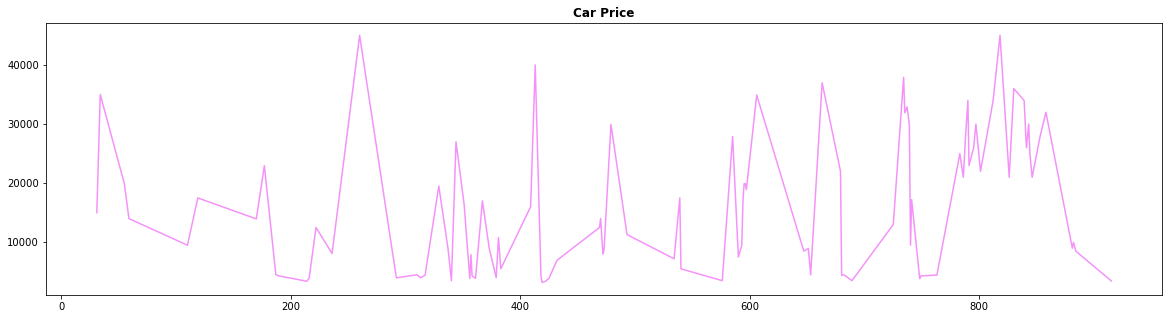

In [77]:
plt.figure(figsize=(20,5))
plt.plot(data['price'][0:100], color='#F492FA')
plt.title("Car Price", fontweight='bold')
plt.show()

<h3 style='color:red;'>6. Train Model</h3>

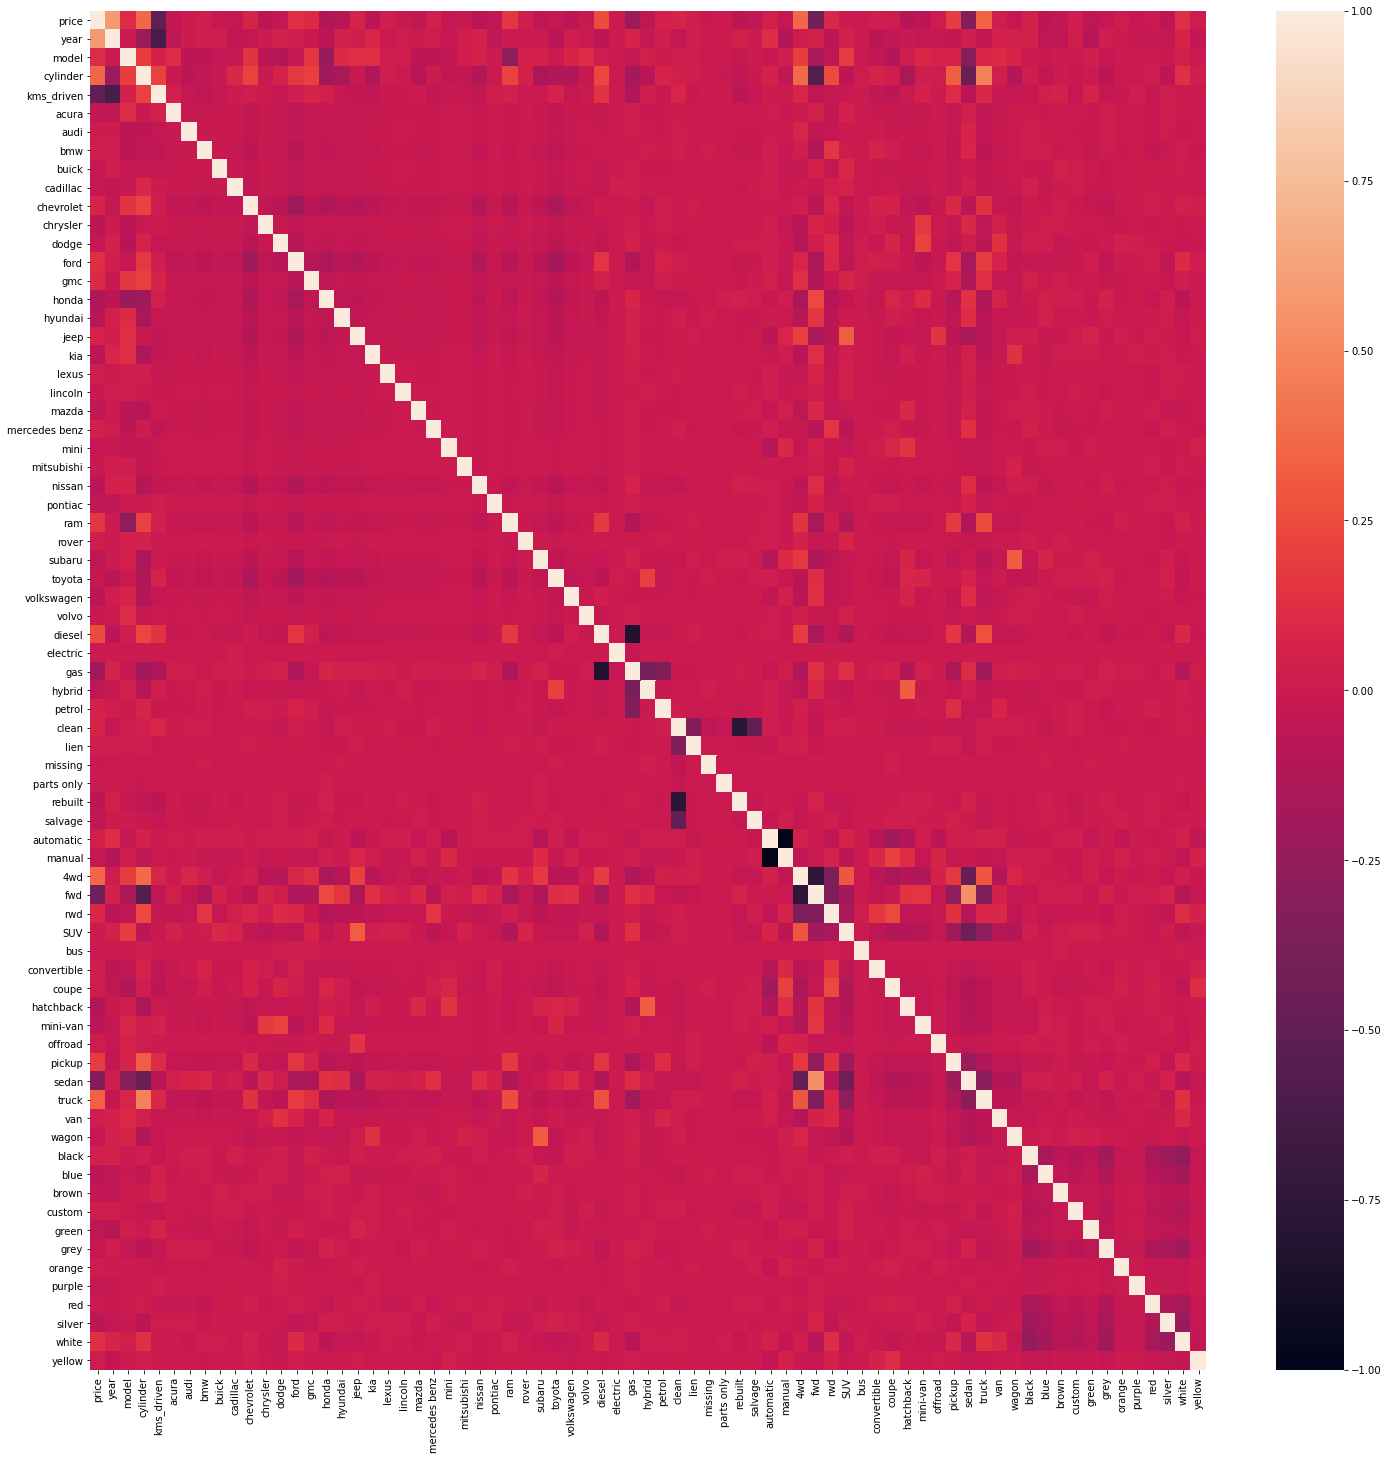

In [78]:
plt.figure(figsize=(25,25))
correlation_train = data_train.corr(method='pearson')
sns.heatmap(correlation_train,
           xticklabels=correlation_train.columns.values,
           yticklabels=correlation_train.columns.values)
plt.show()

In [79]:
data_train.head()

,price,year,model,cylinder,kms_driven,acura,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,ford,gmc,honda,hyundai,jeep,kia,lexus,lincoln,mazda,mercedes benz,mini,mitsubishi,nissan,pontiac,ram,rover,subaru,toyota,volkswagen,volvo,diesel,electric,gas,hybrid,petrol,clean,lien,missing,parts only,rebuilt,salvage,automatic,manual,4wd,fwd,rwd,SUV,bus,convertible,coupe,hatchback,mini-van,offroad,pickup,sedan,truck,van,wagon,black,blue,brown,custom,green,grey,orange,purple,red,silver,white,yellow
242477,0.336438,0.619048,0.494898,0.333333,0.335958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315183,0.964959,0.904762,0.357143,0.333333,0.094139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
118283,0.250524,0.761905,0.525510,0.111111,0.390681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
211435,0.580885,0.809524,0.357143,0.555556,0.209506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
266273,0.010477,0.523810,0.122449,0.333333,0.636001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [80]:
#check statistic description
data_train.describe()

,price,year,model,cylinder,kms_driven,acura,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,ford,gmc,honda,hyundai,jeep,kia,lexus,lincoln,mazda,mercedes benz,mini,mitsubishi,nissan,pontiac,ram,rover,subaru,toyota,volkswagen,volvo,diesel,electric,gas,hybrid,petrol,clean,lien,missing,parts only,rebuilt,salvage,automatic,manual,4wd,fwd,rwd,SUV,bus,convertible,coupe,hatchback,mini-van,offroad,pickup,sedan,truck,van,wagon,black,blue,brown,custom,green,grey,orange,purple,red,silver,white,yellow
count,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.00000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000,40139.000000
mean,0.298542,0.584130,0.475536,0.292846,0.391333,0.012432,0.008919,0.024889,0.008520,0.012307,0.155161,0.013503,0.036025,0.205162,0.036822,0.081890,0.032587,0.053639,0.022746,0.008894,0.005157,0.009641,0.011111,0.001869,0.001918,0.056628,0.002192,0.035676,0.001794,0.024864,0.111587,0.018835,0.005232,0.045118,0.000075,0.935923,0.010713,0.008172,0.951494,0.006228,0.000174,0.000075,0.030046,0.011983,0.954707,0.045293,0.430778,0.422332,0.14689,0.291462,0.000125,0.007947,0.033708,0.024490,0.021550,0.002043,0.094372,0.318319,0.154538,0.022821,0.028626,0.187548,0.100451,0.022646,0.044645,0.019258,0.135454,0.004758,0.002118,0.092553,0.156556,0.227833,0.006179
std,0.235223,0.218431,0.286037,0.176832,0.203590,0.110804,0.094020,0.155787,0.091913,0.110255,0.362062,0.115417,0.186354,0.403825,0.188327,0.274201,0.177555,0.225306,0.149094,0.093889,0.071628,0.097718,0.104825,0.043186,0.043757,0.231134,0.046772,0.185483,0.042315,0.155711,0.314862,0.135942,0.072143,0.207566,0.008645,0.244894,0.102948,0.090028,0.214836,0.078675,0.013205,0.008645,0.170715,0.108812,0.207948,0.207948,0.495191,0.493937,0.35400,0.454442,0.011160,0.088794,0.180478,0.154566,0.145211,0.045153,0.292349,0.465830,0.361468,0.149333,0.166754,0.390356,0.300604,0.148775,0.206525,0.137432,0.342212,0.068818,0.045970,0.289809,0.363386,0.419440,0.078361
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.112398,0.428571,0.219388,0.111111,0.239052,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [81]:
#Dividing data train into x and y variables
Y = data_train.pop('price')
X = data_train

In [82]:
#Apply train_test_split funtion to random dataset
x_train, x_test, y_train, y_test = train_test_split(X,Y , test_size=0.3, random_state=123)

In [83]:
#set l_m
l_m = linear_model.LinearRegression()

In [84]:
%%time
#Train the model
model = l_m.fit(x_train, y_train)

CPU times: user 173 ms, sys: 15.3 ms, total: 189 ms
Wall time: 78.9 ms


In [85]:
# learned parameters
#weights = model.coef_
#bias = model.intercept_

#Linear: y = ax + b
#Linear: y = weight(x)  + Bias

#print('Model parameters as follows:')

#print("--" * 58)
#print("+++ Coeffients: +++")
#for i in weights:
#    print(i)
#print("--" * 58)
#print("+++ Interceptor: +++")
#print('Bias: ', bias)

<h3 style='color:red;'>7. Evaluation Model</h3>

In [86]:
#Try to prediction & test
y_prediction = l_m.predict(x_test)

In [87]:
#check the result
y_prediction_values = pd.DataFrame(list(zip(y_test[0:10], y_prediction[0:10])), 
                                     columns=['Y Test', 'Y Predicted'])
y_prediction_values.head(10)

,Y Test,Y Predicted
0,0.347963,0.313080
1,0.161700,0.158325
2,0.883562,0.619324
3,0.627218,0.528656
4,0.207218,0.211487
5,0.090803,-0.009338
6,0.080326,0.094910
7,0.362631,0.478455
8,0.010477,0.256866
9,0.090803,0.140625


In [88]:
# calculat evaluation measures: mean-square-error and r2-score
mse = metrics.mean_squared_error(y_test, y_prediction)
mae = metrics.mean_absolute_error(y_test, y_prediction)
r2 = metrics.r2_score(y_test, y_prediction)

print("##" * 58)
print('Mean squared error: ', mse)
print("##" * 58)
print('Mean absolute error: ', mae)
print("##" * 58)
print('R2 score: ', r2)
print("##" * 58)

####################################################################################################################
Mean squared error:  0.011750068069404956
####################################################################################################################
Mean absolute error:  0.08240420362918416
####################################################################################################################
R2 score:  0.7832412285646291
####################################################################################################################


<h3 style='color:red;'>**************** Over Fitting VS Under Fitting ****************</h3>

In [89]:
#Check train data score of model
train_score = l_m.score(x_train, y_train)
print("Model Score:", train_score)
print("**" * 58)
print("Model Score (%) :", train_score * 100)

Model Score: 0.7878921716735837
********************************************************************************************************************
Model Score (%) : 78.78921716735837


In [90]:
#Check test data score of model
test_score = l_m.score(x_test, y_test)
print("Model Score:", test_score)
print("**" * 58)
print("Model Score (%) :", test_score * 100)

Model Score: 0.7832412285646291
********************************************************************************************************************
Model Score (%) : 78.3241228564629


<h3 style='color:red;'>**************** Plot The Result ****************</h3>

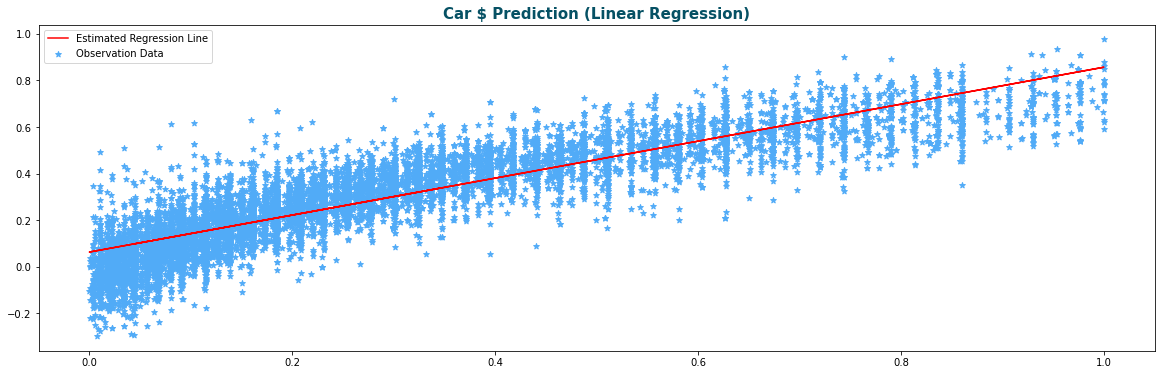

In [100]:
#Plot the results 
#Plot data ft scatter plot
#ravel() function can solve the problem replace to values() function

fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(y_test, y_prediction, color='#51ABF7', marker='*')

#Draw a regression line
y_test, y_prediction = y_test.ravel().reshape(-1,1), y_prediction.ravel().reshape(-1,1)
ax.plot(y_test, LinearRegression().fit(y_test, y_prediction).predict(y_test), color='r')
plt.title("Car $ Prediction (Linear Regression)", color="#065164",fontsize='15', fontweight='bold')
plt.legend(['Estimated Regression Line', 'Observation Data'])

plt.show()

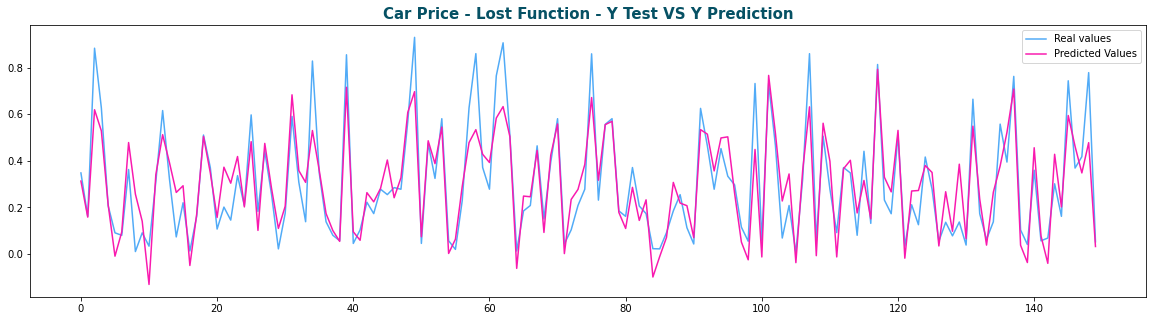

In [92]:
#set it as dataframe
prediction_values = pd.DataFrame(list(zip(y_prediction, y_test)), columns=['predicted_car_price', 
                                                                           'real_car_price'])

plt.figure(figsize=(20, 5))
plt.plot(y_test[0:150].ravel(), label='Real values', color='#51ABF7')
plt.plot(prediction_values['predicted_car_price'][0:150].ravel(), label='Predicted Values', color='#F91AAF')

plt.title('Car Price - Lost Function - Y Test VS Y Prediction',color="#065164",fontsize='15', fontweight='bold')
plt.legend(loc=1)
plt.show()

<h3 style='color:red;'>**************** Validation Set****************</h3>

In [93]:
#learn about data test
y_val = data_test.pop('price')
x_val = data_test

In [94]:
#predict on validation data
y_val_predict = model.predict(x_val)

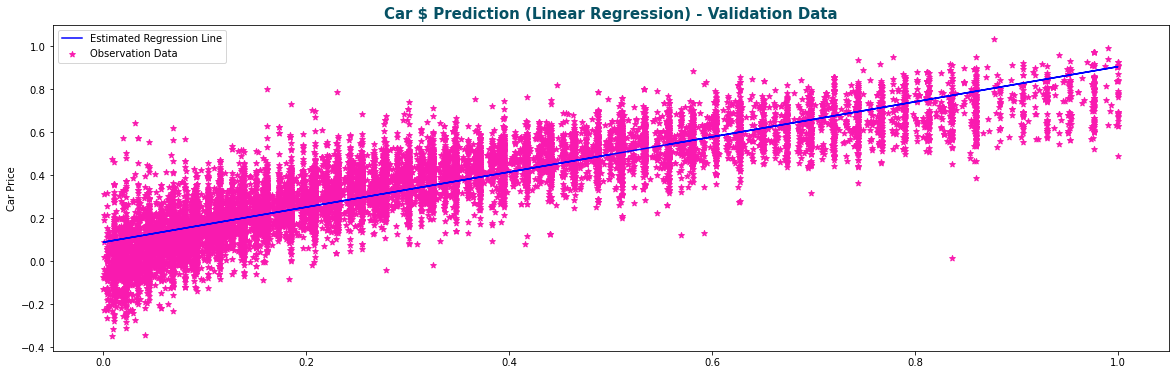

In [95]:
#Plot the results 
#Plot data ft scatter plot
#ravel() function can solve the problem replace to values() function

fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(y_val, y_val_predict, color='#F91AAF', marker='*')

#Draw a regression line
y_val, y_val_predict = y_val.ravel().reshape(-1,1), y_val_predict.ravel().reshape(-1,1)
ax.plot(y_val, LinearRegression().fit(y_val, y_val_predict).predict(y_val), color='b')
plt.title("Car $ Prediction (Linear Regression) - Validation Data", color="#065164",fontsize='15', fontweight='bold')
plt.legend(['Estimated Regression Line', 'Observation Data'])
plt.ylabel("Car Price")
plt.show()